In [ ]:

!pip -q install openpyxl
!pip -q install lime

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from lime import lime_tabular
from lazypredict.Supervised import LazyClassifier
import keras.activations

In [ ]:

import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from lime import lime_tabular
from lazypredict.Supervised import LazyClassifier
import keras.activations


data = pd.read_csv("/content/parkinsons.data", header=0)

columns_to_convert = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')


print(data.columns)
print(data.info())
print(data.isna().sum())
print(data.describe())

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer   

In [ ]:
x = data.drop(columns=['name','status'], axis=1)
y = data['status']

In [ ]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.99,157.30,75.00,0.01,0.00,0.00,0.01,0.01,0.04,...,0.07,0.02,21.03,1,0.41,0.82,-4.81,0.27,2.30,0.28
1,phon_R01_S01_2,122.40,148.65,113.82,0.01,0.00,0.00,0.01,0.01,0.06,...,0.09,0.02,19.09,1,0.46,0.82,-4.08,0.34,2.49,0.37
2,phon_R01_S01_3,116.68,131.11,111.56,0.01,0.00,0.01,0.01,0.02,0.05,...,0.08,0.01,20.65,1,0.43,0.83,-4.44,0.31,2.34,0.33
3,phon_R01_S01_4,116.68,137.87,111.37,0.01,0.00,0.01,0.01,0.02,0.05,...,0.09,0.01,20.64,1,0.43,0.82,-4.12,0.33,2.41,0.37
4,phon_R01_S01_5,116.01,141.78,110.66,0.01,0.00,0.01,0.01,0.02,0.06,...,0.10,0.02,19.65,1,0.42,0.82,-3.75,0.23,2.33,0.41


In [ ]:

print(y[y==1].shape[0], y[y==0].shape[0])

147 48


In [ ]:

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
import pickle

print(type(scaler))
with open("scalerxg.pkl", "wb") as f:
    pickle.dump(scaler, f)

<class 'sklearn.preprocessing._data.MinMaxScaler'>


In [ ]:
modelXG=XGBClassifier()
modelXG.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=modelXG.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [ ]:
import joblib
joblib.dump(modelXG, 'modelxg.pkl')

['modelxg.pkl']

In [ ]:


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



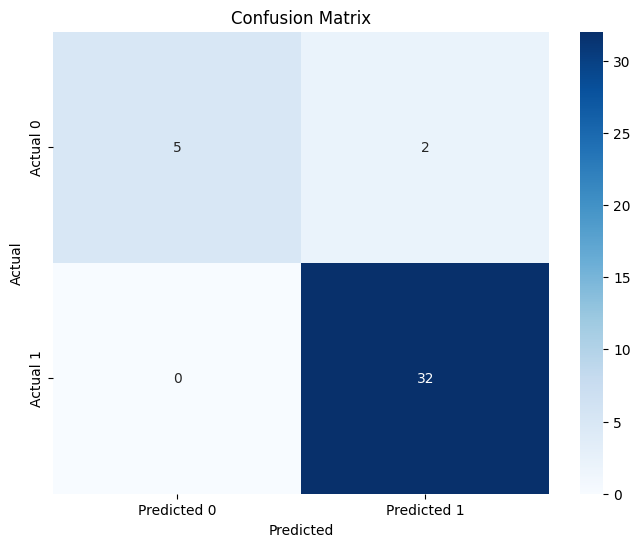

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import seaborn as sns

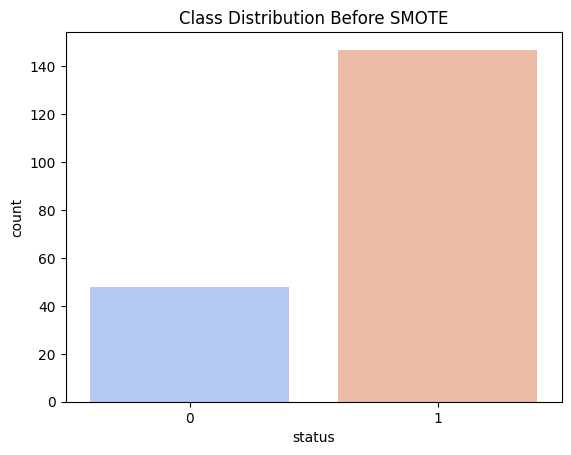

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_original = pd.DataFrame(x, columns=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'])
df_original['status'] = y


fig, ax = plt.subplots()


sns.countplot(x=df_original['status'], palette='coolwarm', ax=ax)
ax.set_title('Class Distribution Before SMOTE')

plt.show()

In [ ]:


smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


In [ ]:
x_train.shape , y_train.shape

((230, 22), (230,))

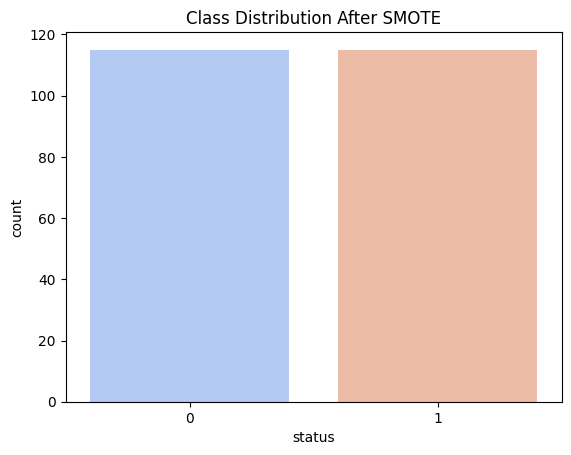

In [ ]:


df_resampled = pd.DataFrame(x_train, columns=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'])
df_resampled['status'] = y_train


fig, ax = plt.subplots()


sns.countplot(x=df_resampled['status'], palette='coolwarm', ax=ax)
ax.set_title('Class Distribution After SMOTE')

plt.show()


In [ ]:


import numpy as np

timesteps = 1
n_features = x_train.shape[1]

x_train_reshaped = x_train.reshape(x_train.shape[0], timesteps, n_features)
x_test_reshaped = x_test.reshape(x_test.shape[0], timesteps, n_features)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (230, 22)
x_test shape: (39, 22)


**LSTM**

In [ ]:
model_lstm = keras.models.Sequential([
    keras.layers.LSTM(64, dropout=0.25, return_sequences=True),
    keras.layers.LSTM(32, dropout=0.25),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model_lstm.compile(loss="binary_crossentropy",optimizer="adam",metrics=(["accuracy"]))


In [ ]:
history = model_lstm.fit(x_train_reshaped, y_train, epochs=150, validation_split = 0.2)


Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - accuracy: 0.6234 - loss: 0.6919 - val_accuracy: 0.0000e+00 - val_loss: 0.7041
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5987 - loss: 0.6875 - val_accuracy: 0.0000e+00 - val_loss: 0.7141
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6105 - loss: 0.6805 - val_accuracy: 0.0000e+00 - val_loss: 0.7259
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6281 - loss: 0.6701 - val_accuracy: 0.0000e+00 - val_loss: 0.7420
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6581 - loss: 0.6563 - val_accuracy: 0.0000e+00 - val_loss: 0.7583
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6440 - loss: 0.6406 - val_accuracy: 0.0000e+00 - val_loss: 0.7694
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6282 - loss: 0.6322 - val_accuracy: 0.0000e+00 - val_loss: 0.8004
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6653 - loss: 0.6016 - val

In [ ]:
score = model_lstm.evaluate(x_test_reshaped, y_test)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8833 - loss: 0.1877
Test Loss: 0.19863452017307281
Test Accuracy: 0.8717948794364929


In [ ]:
from sklearn.metrics import classification_report

y_pred  = model_lstm.predict(x_test_reshaped)
y_pred = np.where(y_pred > 0.5, 1, 0)


print(classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 428ms/step
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



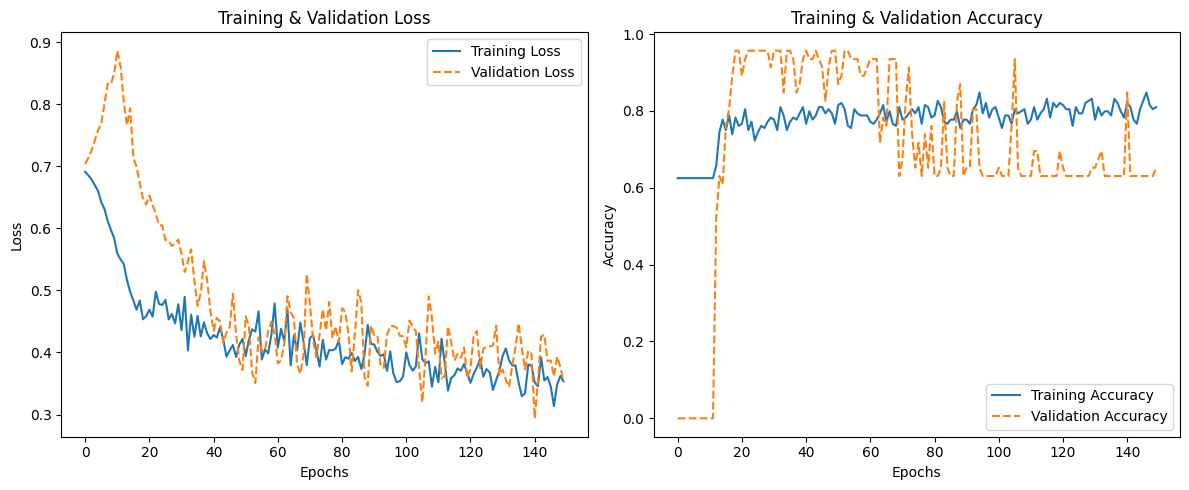

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


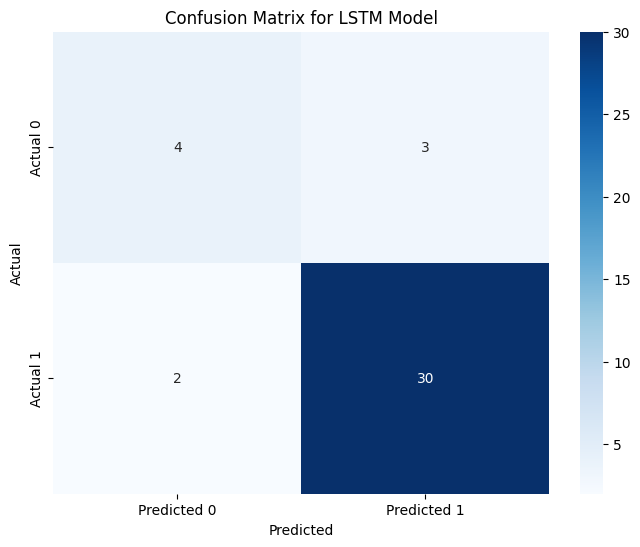

In [ ]:


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LSTM Model')
plt.show()


In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [ ]:


import keras_tuner as kt

def build_model(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        dropout=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1),
        return_sequences=True,
        input_shape=(timesteps, n_features)
    ))


    for i in range(hp.Int('n_layers', 1, 3)):
      model.add(keras.layers.LSTM(
          units=hp.Int(f'units_{i+2}', min_value=32, max_value=128, step=32),
          dropout=hp.Float(f'dropout_{i+2}', min_value=0.1, max_value=0.5, step=0.1),
          return_sequences=True if i < hp.Int('n_layers', 1, 3) -1 else False
      ))

    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=8, max_value=64, step=8),
        activation=hp.Choice('dense_activation', values=['relu', 'elu'])
    ))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(x_train_reshaped, y_train, epochs=10, validation_data=(x_test_reshaped, y_test))


best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first LSTM layer is {best_hps.get('units_1')}
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")



model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train_reshaped, y_train, epochs=50, validation_data=(x_test_reshaped, y_test))


Reloading Tuner from my_dir/intro_to_kt/tuner0.json

The hyperparameter search is complete. The optimal number of units in the first LSTM layer is 64
and the optimal learning rate for the optimizer is 0.00017953551141880843.

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.4435 - loss: 0.6947 - val_accuracy: 0.6923 - val_loss: 0.6925
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4999 - loss: 0.6936 - val_accuracy: 0.6410 - val_loss: 0.6927
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6118 - loss: 0.6921 - val_accuracy: 0.7949 - val_loss: 0.6914
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7498 - loss: 0.6906 - val_accuracy: 0.7692 - val_loss: 0.6904
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7005 - loss: 0.6896 - val_accuracy: 0.8205 - val_loss: 0.6891
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6989 - loss: 0.6883 - val_accuracy: 0.7436 - val_loss: 0.6888
Epoch 7/50
8/8 ━━━━━━━━

In [ ]:
score = model.evaluate(x_test_reshaped, y_test)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8833 - loss: 0.3911
Test Loss: 0.40987226366996765
Test Accuracy: 0.8717948794364929


In [ ]:
from sklearn.metrics import classification_report

y_pred  = model.predict(x_test_reshaped)
y_pred = np.where(y_pred > 0.5, 1, 0)


print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step
              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       1.00      0.84      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.92      0.83        39
weighted avg       0.93      0.87      0.88        39



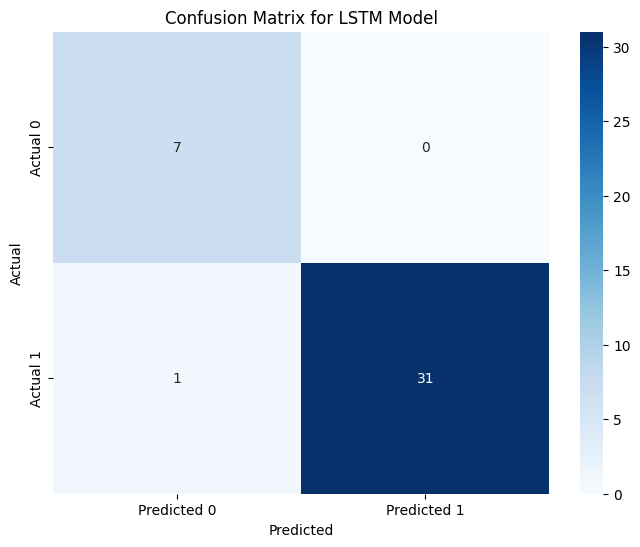

In [ ]:


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LSTM Model')
plt.show()


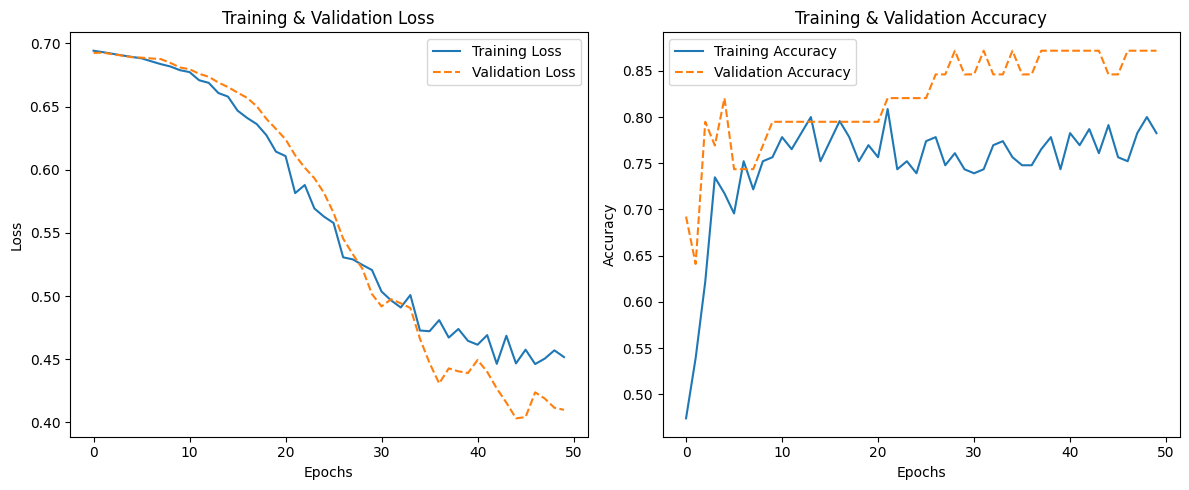

In [ ]:


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**GRU**

In [ ]:
model_gru = keras.models.Sequential([
    keras.layers.GRU(32, dropout=0.25),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model_gru.compile(loss="binary_crossentropy",optimizer="adam",metrics=(["accuracy"])) # binary_crossentropy is a suitable loss for binary classification


In [ ]:
history = model_gru.fit(x_train_reshaped, y_train, epochs=150, validation_split = 0.2 )

Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.6037 - loss: 0.6876 - val_accuracy: 0.0000e+00 - val_loss: 0.7117
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6379 - loss: 0.6787 - val_accuracy: 0.0000e+00 - val_loss: 0.7320
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6228 - loss: 0.6718 - val_accuracy: 0.0000e+00 - val_loss: 0.7594
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6119 - loss: 0.6620 - val_accuracy: 0.0000e+00 - val_loss: 0.7960
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6393 - loss: 0.6430 - val_accuracy: 0.0000e+00 - val_loss: 0.8310
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6689 - loss: 0.6258 - val_accuracy: 0.0000e+00 - val_loss: 0.8436
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6162 - loss: 0.6321 - val_accuracy: 0.0000e+00 - val_loss: 0.8460
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6523 - loss: 0.6081 - val

In [ ]:
score = model_gru.evaluate(x_test_reshaped , y_test)
print("test loss  : ", score[0])
print("test accuracy  : ", score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9108 - loss: 0.2404
test loss  :  0.24853721261024475
test accuracy  :  0.8974359035491943


In [ ]:
from sklearn.metrics import classification_report

y_pred  = model_gru.predict(x_test_reshaped)
y_pred = np.where(y_pred > 0.5, 1, 0)


print(classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.88      0.93        32

    accuracy                           0.90        39
   macro avg       0.82      0.94      0.86        39
weighted avg       0.93      0.90      0.91        39



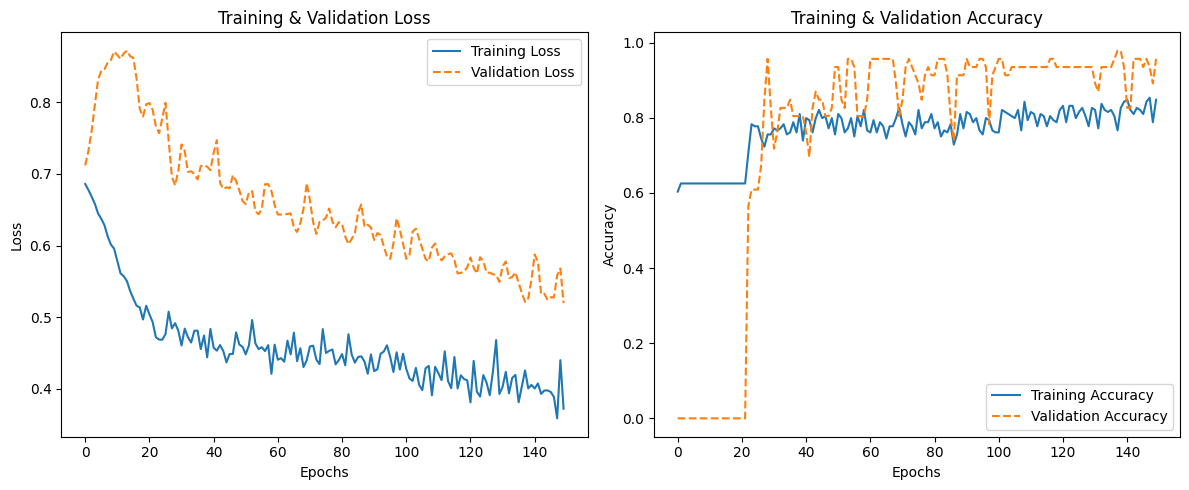

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


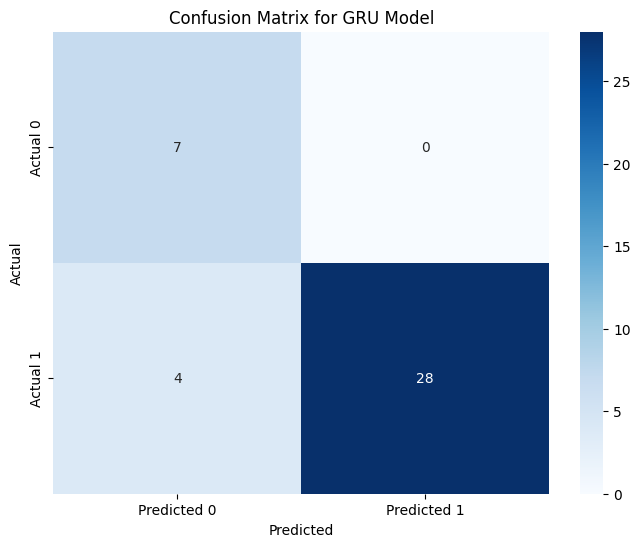

In [ ]:
# prompt: code for the onfussion matrix

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GRU Model')
plt.show()


**BIdirectional** LSTM





In [ ]:
model_bilstm = keras.models.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(64, dropout=0.25, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(32, dropout=0.25)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model_bilstm.compile(loss="binary_crossentropy",optimizer="adam",metrics=(["accuracy"]))


In [ ]:
history = model_bilstm.fit(x_train_reshaped, y_train, epochs=150, validation_data=(x_test_reshaped, y_test))


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - accuracy: 0.5330 - loss: 0.6915 - val_accuracy: 0.2821 - val_loss: 0.6983
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5368 - loss: 0.6864 - val_accuracy: 0.3846 - val_loss: 0.6989
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6691 - loss: 0.6690 - val_accuracy: 0.6154 - val_loss: 0.6866
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7708 - loss: 0.6532 - val_accuracy: 0.7179 - val_loss: 0.6668
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7807 - loss: 0.6258 - val_accuracy: 0.6154 - val_loss: 0.6685
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7055 - loss: 0.6072 - val_accuracy: 0.7436 - val_loss: 0.6472
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7809 - loss: 0.5715 - val_accuracy: 0.7692 - val_loss: 0.5935
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7555 - loss: 0.5437 - val_accuracy: 0.8718 - val_los

In [ ]:
score = model_bilstm.evaluate(x_test_reshaped, y_test)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9175 - loss: 0.1875
Test Loss: 0.18735326826572418
Test Accuracy: 0.9230769276618958


In [ ]:
from sklearn.metrics import classification_report

y_pred  = model_bilstm.predict(x_test_reshaped)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = y_pred.flatten()

print(classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 800ms/step
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.91      0.95        32

    accuracy                           0.92        39
   macro avg       0.85      0.95      0.89        39
weighted avg       0.95      0.92      0.93        39



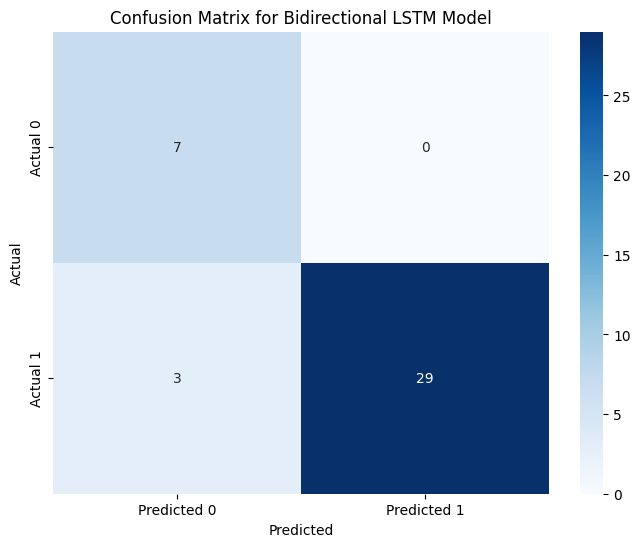

In [ ]:

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bidirectional LSTM Model')
plt.show()


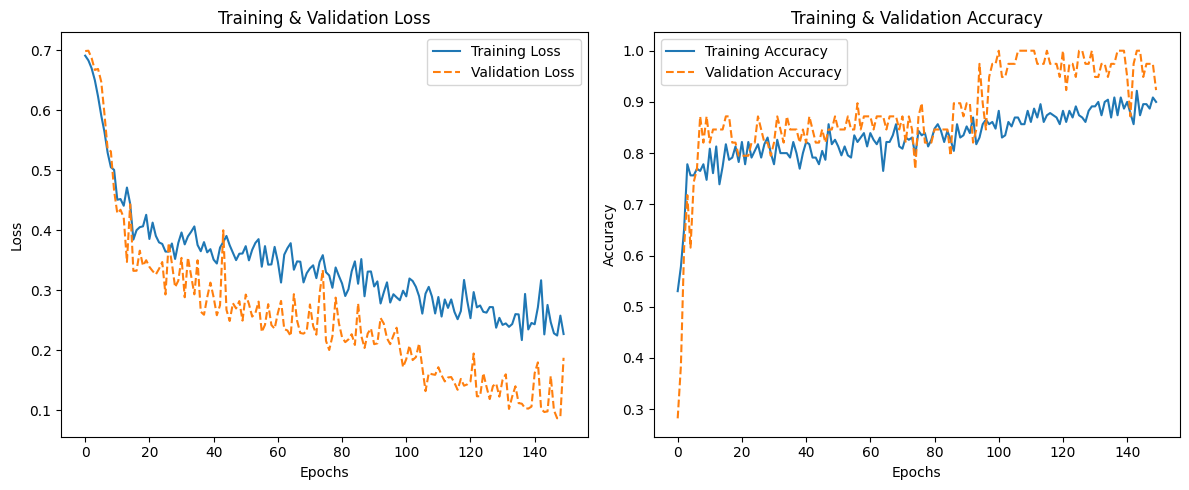

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
x_train_reshaped.shape

(230, 1, 22)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout


model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])),
    LSTM(100, activation='relu', return_sequences=True),
    Dropout(0.1),
    GRU(256, return_sequences=True),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(name='f1_score')]
)


model.summary()


epochs = 200





Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 1, 100)              │          49,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 1, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 1, 256)              │         274,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,081 (1.73 MB)

 Trainable params: 454,081 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train_reshaped, y_train, epochs=epochs,  validation_split=0.2, batch_size=32)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.6132 - f1_score: 0.5059 - loss: 0.6897 - precision: 0.6132 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 0.7680 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6135 - f1_score: 0.5811 - loss: 0.6726 - precision: 0.6135 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 0.8998 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6097 - f1_score: 0.7598 - loss: 0.6548 - precision: 0.6097 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 1.0449 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6202 - f1_score: 0.8577 - loss: 0.6255 - precision: 0.6202 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_l

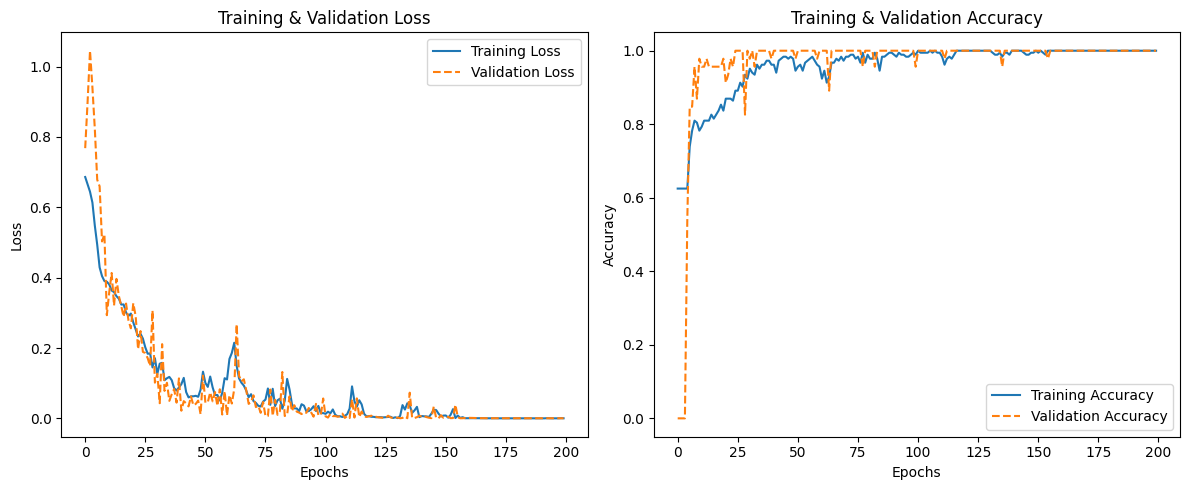

In [ ]:

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
score = model.evaluate(x_test_reshaped, y_test)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9829 - f1_score: 0.9524 - loss: 0.2308 - precision: 0.9798 - recall: 1.0000    
Test Loss: 0.3461979031562805
Test Accuracy: 0.9743589758872986


In [ ]:
from sklearn.metrics import classification_report

y_pred  = model.predict(x_test_reshaped)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = y_pred.flatten()

print(classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



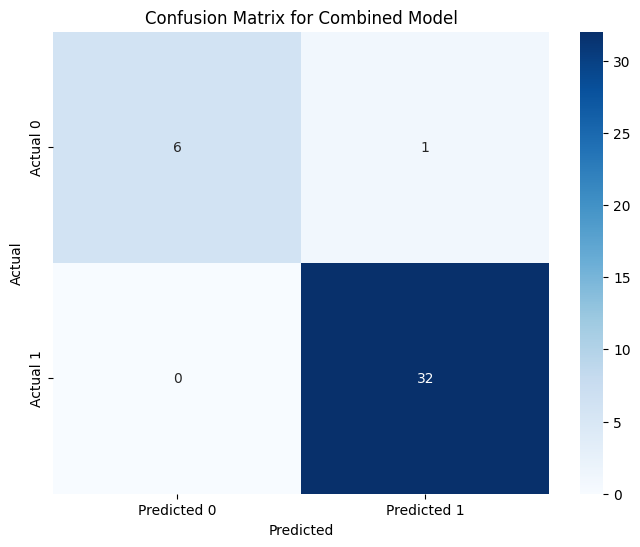

In [ ]:
# prompt: code for confusion matrix

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Combined Model')
plt.show()


In [ ]:
 model_metrics = {
    'XGBClassifier': {'accuracy': 0.95, 'precision': 0.97, 'f1-score': 0.90},
    'LSTM': {'accuracy': 0.87, 'precision': 0.79, 'f1-score': 0.77},
    'GRU': {'accuracy': 0.90, 'precision': 0.82, 'f1-score': 0.86},
    'Bidirectional LSTM': {'accuracy': 0.92, 'precision': 0.85, 'f1-score': 0.89},
    'LSTM + GRU': {'accuracy': 0.97, 'precision': 0.98, 'f1-score': 0.95}

}

In [ ]:
model_names = list(model_metrics.keys())
accuracy_scores = [model_metrics[model]['accuracy'] for model in model_names]
precision_scores = [model_metrics[model]['precision'] for model in model_names]
f1_scores = [model_metrics[model]['f1-score'] for model in model_names]

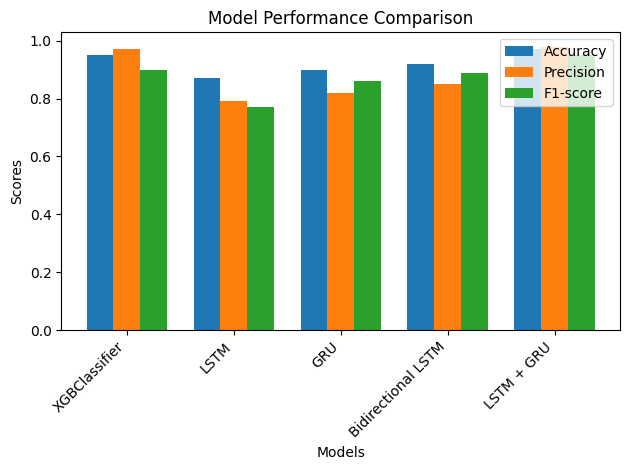

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Width of each bar
bar_width = 0.25

# Create an array of model indices for the x-axis
model_indices = np.arange(len(model_names))

# Create the bar plots
plt.bar(model_indices, accuracy_scores, width=bar_width, label='Accuracy')
plt.bar(model_indices + bar_width, precision_scores, width=bar_width, label='Precision')
plt.bar(model_indices + 2 * bar_width, f1_scores, width=bar_width, label='F1-score')

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(model_indices + bar_width, model_names, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()